In [1]:
from llm_call import get_response

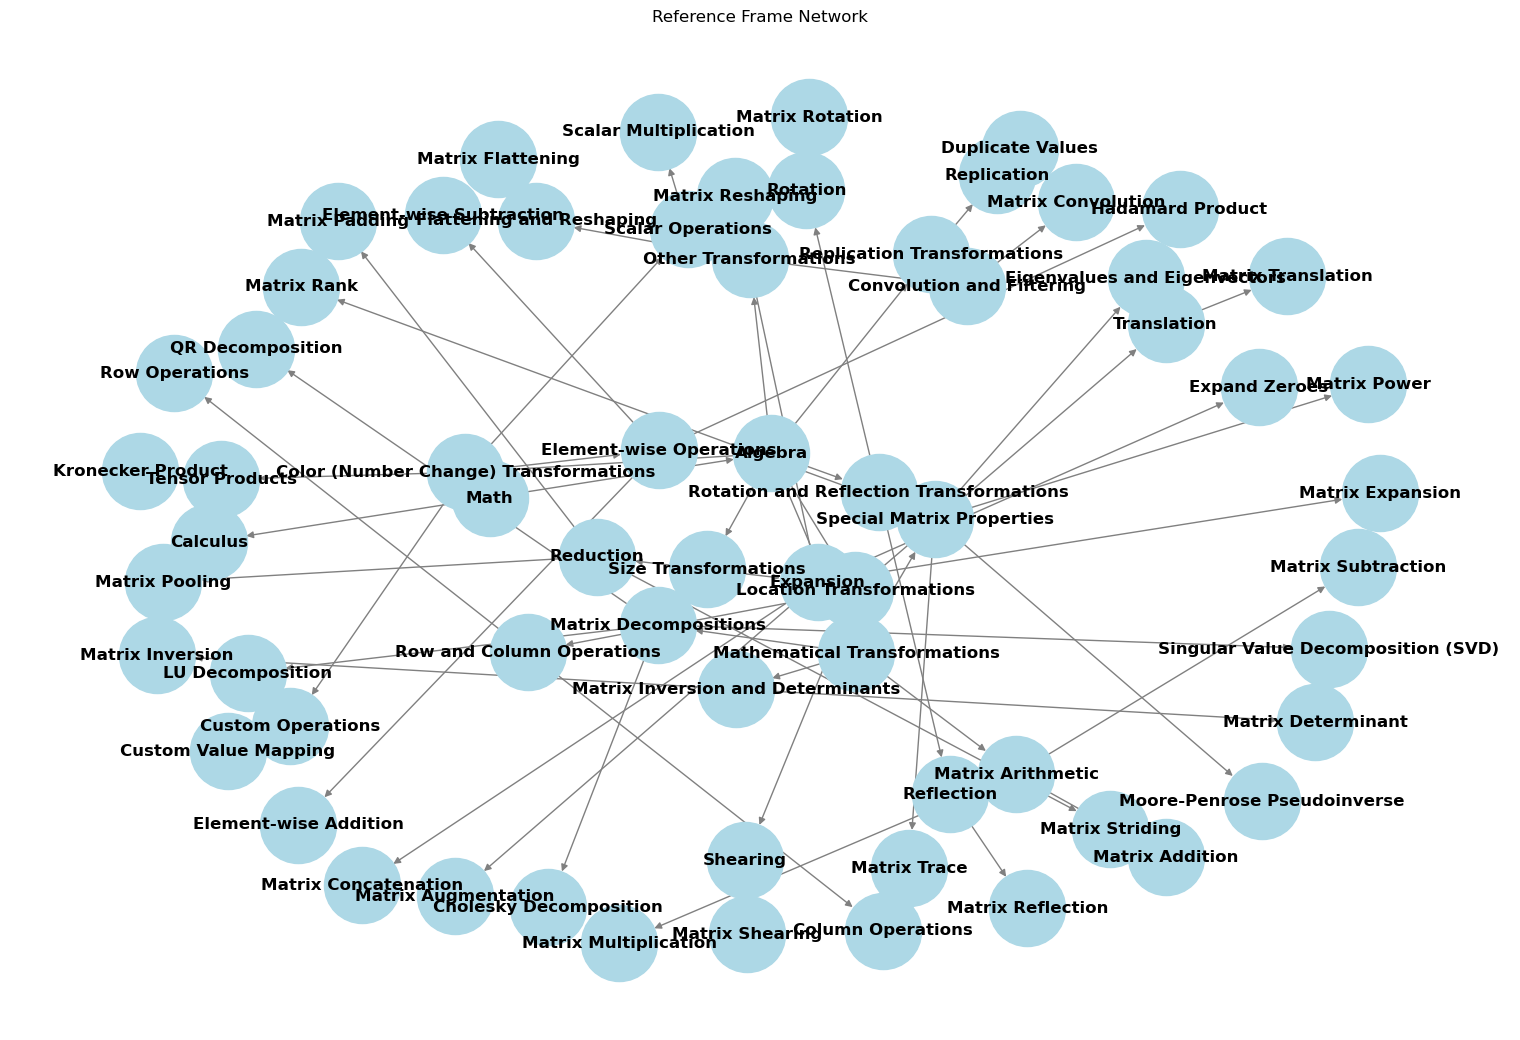

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class ReferenceFrame:
    def __init__(self, name):
        self.name = name
        self.information = ""
        self.metadata = {}
        self.annotations = []
        self.children = {}
        self.parents = {}

    def add_child(self, child_frame):
        self.children[child_frame.name] = child_frame
        child_frame.parents[self.name] = self

    def add_parent(self, parent_frame):
        self.parents[parent_frame.name] = parent_frame
        parent_frame.children[self.name] = self

    def add_information(self, info):
        self.information += " " + info

    def get_information(self):
        return self.information

    def add_metadata(self, key, value):
        self.metadata[key] = value

    def add_annotation(self, annotation):
        self.annotations.append(annotation)

    def navigate_to_child(self, child_name):
        return self.children.get(child_name, None)

    def navigate_to_parent(self, parent_name):
        return self.parents.get(parent_name, None)

class ReferenceFrameNetwork:
    def __init__(self):
        self.frames = {}

    def add_frame(self, frame_name):
        if frame_name not in self.frames:
            self.frames[frame_name] = ReferenceFrame(frame_name)
        return self.frames[frame_name]

    def get_frame(self, frame_name):
        return self.frames.get(frame_name, None)

    def add_information_to_frame(self, frame_name, info):
        frame = self.get_frame(frame_name)
        if frame:
            frame.add_information(info)

    def link_frames(self, parent_name, child_name):
        parent_frame = self.add_frame(parent_name)
        child_frame = self.add_frame(child_name)
        parent_frame.add_child(child_frame)

    def generate_graph(self):
        graph = nx.DiGraph()
        for frame_name, frame in self.frames.items():
            for child_name in frame.children:
                graph.add_edge(frame_name, child_name)
        return graph

    def visualize_graph(self):
        graph = self.generate_graph()
        pos = nx.spring_layout(graph)
        plt.figure(figsize=(15, 10))
        nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12, font_weight='bold')
        plt.title("Reference Frame Network")
        plt.show()

# Create the reference frame network
network = ReferenceFrameNetwork()

# Add initial nodes for different subjects
network.add_frame("Math")
network.add_frame("Science")

# Add sub-nodes under Math
network.add_information_to_frame("Algebra", "Algebra is the study of mathematical symbols and the rules for manipulating these symbols.")
network.add_information_to_frame("Calculus", "Calculus is the mathematical study of continuous change.")
network.link_frames("Math", "Algebra")
network.link_frames("Math", "Calculus")

# Add sub-nodes under Algebra (Matrix Transformations)
categories = {
    "Size Transformations": {
        "Expansion": [
            "Matrix Reshaping",
            "Matrix Expansion",
            "Matrix Augmentation",
            "Matrix Concatenation",
            "Expand Zeroes"
        ],
        "Reduction": [
            "Matrix Pooling",
            "Matrix Striding",
            "Matrix Padding"
        ]
    },
    "Rotation and Reflection Transformations": {
        "Rotation": ["Matrix Rotation"],
        "Reflection": ["Matrix Reflection"]
    },
    "Location Transformations": {
        "Translation": ["Matrix Translation"],
        "Shearing": ["Matrix Shearing"],
        "Row and Column Operations": [
            "Row Operations",
            "Column Operations"
        ]
    },
    "Color (Number Change) Transformations": {
        "Scalar Operations": ["Scalar Multiplication"],
        "Element-wise Operations": [
            "Element-wise Addition",
            "Element-wise Subtraction",
            "Hadamard Product"
        ],
        "Tensor Products": ["Kronecker Product"],
        "Custom Operations": [
            "Custom Value Mapping"
        ]
    },
    "Replication Transformations": {
        "Replication": [
            "Duplicate Values"
        ]
    },
    "Mathematical Transformations": {
        "Matrix Arithmetic": [
            "Matrix Addition",
            "Matrix Subtraction",
            "Matrix Multiplication"
        ],
        "Matrix Inversion and Determinants": [
            "Matrix Inversion",
            "Matrix Determinant"
        ],
        "Matrix Decompositions": [
            "Singular Value Decomposition (SVD)",
            "QR Decomposition",
            "LU Decomposition",
            "Cholesky Decomposition"
        ],
        "Special Matrix Properties": [
            "Matrix Rank",
            "Matrix Trace",
            "Eigenvalues and Eigenvectors",
            "Matrix Power",
            "Moore-Penrose Pseudoinverse"
        ]
    },
    "Other Transformations": {
        "Flattening and Reshaping": ["Matrix Flattening"],
        "Convolution and Filtering": ["Matrix Convolution"]
    }
}

transformation_descriptions = {
    "Matrix Addition": "Matrix addition is the operation of adding two matrices by adding the corresponding entries together.",
    "Matrix Subtraction": "Matrix subtraction is the operation of subtracting the corresponding entries of two matrices.",
    "Scalar Multiplication": "Scalar multiplication involves multiplying each entry of a matrix by a scalar value.",
    "Matrix Multiplication": "Matrix multiplication is the operation of multiplying two matrices by taking the dot product of rows and columns.",
    "Matrix Transpose": "The transpose of a matrix is obtained by swapping its rows and columns.",
    "Matrix Inversion": "The inverse of a matrix A is a matrix B such that AB = BA = I, where I is the identity matrix.",
    "Matrix Determinant": "The determinant is a scalar value that can be computed from the elements of a square matrix and encodes certain properties of the matrix.",
    "Matrix Rank": "The rank of a matrix is the dimension of the vector space generated by its columns.",
    "Matrix Trace": "The trace of a matrix is the sum of its diagonal elements.",
    "Eigenvalues and Eigenvectors": "Eigenvalues are scalars associated with a square matrix that satisfy the equation Ax = λx, where x is a non-zero vector and λ is a scalar. Eigenvectors are the corresponding vectors.",
    "Singular Value Decomposition (SVD)": "Singular value decomposition is a factorization of a matrix into three matrices U, Σ, and V such that A = UΣV^T.",
    "QR Decomposition": "QR decomposition is a factorization of a matrix into an orthogonal matrix Q and an upper triangular matrix R.",
    "LU Decomposition": "LU decomposition is the factorization of a matrix into a lower triangular matrix L and an upper triangular matrix U.",
    "Cholesky Decomposition": "Cholesky decomposition is the factorization of a positive-definite matrix into the product of a lower triangular matrix and its conjugate transpose.",
    "Matrix Power": "Matrix power is the operation of raising a matrix to a given integer power.",
    "Hadamard Product": "Hadamard product is the element-wise multiplication of two matrices.",
    "Kronecker Product": "Kronecker product is the tensor product of two matrices.",
    "Moore-Penrose Pseudoinverse": "The Moore-Penrose pseudoinverse is a generalization of the matrix inverse that can be applied to non-square matrices.",
    "Row Operations": "Row operations include row addition, row multiplication, and row swapping.",
    "Column Operations": "Column operations include column addition, column multiplication, and column swapping.",
    "Element-wise Addition": "Element-wise addition involves adding two matrices by adding the corresponding entries.",
    "Element-wise Subtraction": "Element-wise subtraction involves subtracting the corresponding entries of two matrices.",
    "Element-wise Operations": "Element-wise operations include addition, subtraction, multiplication, and division applied to each element of the matrix.",
    "Matrix Reshaping": "Matrix reshaping is the operation of changing the shape of a matrix without changing its data.",
    "Matrix Flattening": "Matrix flattening is the operation of converting a matrix into a single row or column.",
    "Matrix Rotation": "Matrix rotation involves rotating the elements of the matrix in a specified direction.",
    "Matrix Reflection": "Matrix reflection involves reflecting the matrix elements across a specified axis.",
    "Matrix Scaling": "Matrix scaling involves multiplying the matrix by a scalar to change its size.",
    "Matrix Translation": "Matrix translation involves shifting the matrix elements by a specified amount.",
    "Matrix Shearing": "Matrix shearing involves distorting the matrix elements by a specified factor.",
    "Matrix Augmentation": "Matrix augmentation involves appending additional rows or columns to a matrix.",
    "Matrix Concatenation": "Matrix concatenation involves joining two matrices along a specified axis.",
    "Matrix Padding": "Matrix padding involves adding zeros or other values around the edges of a matrix.",
    "Matrix Striding": "Matrix striding involves taking steps of a specified size within the matrix.",
    "Matrix Expansion": "Matrix expansion involves enlarging the matrix by replicating its elements.",
    "Matrix Convolution": "Matrix convolution involves applying a filter to the matrix elements to produce a transformed matrix.",
    "Matrix Pooling": "Matrix pooling involves reducing the matrix size by taking the maximum, minimum, or average of its elements within a specified window.",
    "Custom Value Mapping": "Custom value mapping involves transforming matrix values based on a predefined mapping function.",
    "Duplicate Values": "Duplicate Values is the operation of duplicating specific values in the matrix with another matrix.",
    "Expand Zeroes": "Expand Zeroes is the operation of expanding each zero in the input matrix to a block of zeroes of specified size."
}

# Adding categories and their subcategories to the network
for category, subcategories in categories.items():
    network.add_frame(category)
    network.link_frames("Algebra", category)
    for subcategory, transformations in subcategories.items():
        network.add_frame(subcategory)
        network.link_frames(category, subcategory)
        for transformation in transformations:
            network.add_information_to_frame(transformation, transformation_descriptions[transformation])
            network.link_frames(subcategory, transformation)

# Visualize the reference frame network graph
network.visualize_graph()


In [3]:
from navigation_frames import navigate_reference_frames

# Example usage:
matrix1 = [
    [0, 7, 7],
    [7, 7, 7],
    [0, 7, 7]
]
matrix2 = [
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [7, 7, 7, 7, 7, 7, 7, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7]
]

result = navigate_reference_frames(network, matrix1, matrix2)
print(result)

Math
Algebra
['Size Transformations', 'Replication Transformations']
['Size Transformations', 'Replication Transformations']
Series of sub-categories identified and added: ['Size Transformations', 'Replication Transformations']


In [5]:
from solver_func import Solver
import numpy as np

# Example usage:
solver = Solver(network)
matrix1 = np.array([
    [0, 7, 7],
    [7, 7, 7],
    [0, 7, 7]
])
matrix2 = np.array([
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [7, 7, 7, 7, 7, 7, 7, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7]
])
categories = ['Size Transformations', 'Replication Transformations']
result = solver.solve(matrix1, matrix2, categories)
print(result)

Transformation <lambda> from Replication in Replication Transformations works.
